In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
from tensorflow.keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


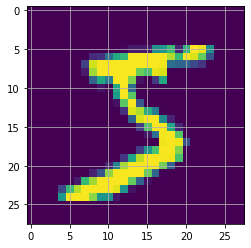

In [ ]:
plt.figure()
plt.imshow(xtrain[0].reshape(28, 28))
plt.grid(True)
plt.show()

In [9]:








xtrain = xtrain/255.0
xtest = xtest/255.0

#normalize between 0 and 1

print(xtrain.shape)

#[[0], [0], [0], [1]]

xtrain = xtrain.reshape((xtrain.shape[0], 28, 28, 1))
xtest = xtest.reshape((xtest.shape[0], 28, 28, 1))

k = tf.keras

print(ytrain)

ytrain = k.utils.to_categorical(ytrain)
ytest = k.utils.to_categorical(ytest)

print(ytrain)

(60000, 28, 28, 1)
[[[[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]



  [[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]



  [[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]



  ...



  [[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]



  [[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]



  [[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]]




 [[[[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]


   [[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]]



  [[[[0. 1.]
     [1. 0.]]

    [[1. 0.]
     [0. 1.]]]


   [[[1. 0.]
     [0. 1.]]

    [[0. 1.]
     [1. 0.]]]]



  [[[[0. 1.]
     [1. 0.]]

In [ ]:
model = k.Sequential()
model.add(k.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(k.layers.MaxPooling2D((2, 2)))
model.add(k.layers.Flatten())
model.add(k.layers.Dense(100, activation='relu'))
model.add(k.layers.Dense(10, activation='softmax'))

model.compile(optimizer=k.optimizers.SGD(lr=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(xtrain, ytrain, epochs=1)

1875/1875 [==============================] - 33s 17ms/step - loss: 0.2438 - accuracy: 0.9258


Predicted: 1(0.9608931)


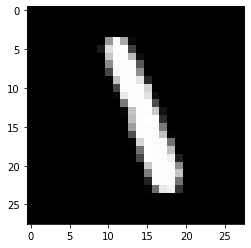

In [ ]:
predictions = model.predict(xtest)
imgnum = 46
print('Predicted: ' + str(np.argmax(predictions[imgnum])) + '(' + str(np.max(predictions[imgnum])) + ')')
plt.figure()
plt.imshow(xtest[imgnum].reshape(28, 28), cmap='gray')
plt.grid(False)
plt.show()